In [1]:
# setup for testing
!pip install random-user-agent --root-user-action=ignore --quiet

import foxess as f
import private as my

f.username = my.fox_username
f.password = my.fox_password
f.device_sn = my.fox_device_sn


FoxESS-Cloud version 0.6.0


In [2]:
f.get_info()

{'user': 'tonymatthews89',
 'name': 'Tony Matthews',
 'phone': '07748987537',
 'email': 'tony.matthews1@outlook.com',
 'country': 'GB',
 'city': 'Swindon',
 'address': '89 Okebourne Park',
 'postcode': '',
 'note': '',
 'clientID': '08fd6e5aafa84i4301rae51g6dfd7a779edc',
 'countryName': 'United Kingdom',
 'access': 1}

In [3]:
f.messages['en']['0']

'success'

In [4]:
f.get_status()

{'total': 1, 'normal': 1, 'fault': 0, 'offline': 0}

In [5]:
f.get_status(station=1)

{'total': 1, 'normal': 1, 'abnormal': 0, 'offline': 0}

In [6]:
f.get_site()

{'name': '89 Okebourne Park',
 'capacity': 6,
 'capacitySolaryaan': '',
 'type': 2,
 'quantity': 1,
 'country': 'United Kingdom',
 'countryCode': 'GB',
 'city': 'Swindon',
 'address': '89 Okebourne Park',
 'postcode': 'SN3 6AJ',
 'price': '',
 'createdDate': '2023-01-10 13:23:49 GMT+0000',
 'status': 1,
 'stationID': 'ffca8cc5-6d3b-4d43-ba55-72d9e0828f0b',
 'systemCapacity': 6400,
 'generationToday': 7.300000000000182,
 'power': 0.502,
 'allowEdit': False,
 'position': {'format': 'dd', 'x': '', 'y': '', 'pid': ''},
 'pileSN': '',
 'pileState': 0}

In [7]:
f.get_logger()

{'moduleID': '85044387-f2a4-4bd1-9ff1-42dbe066fce1',
 'moduleSN': '669L3EPF22WA061',
 'moduleType': 'L3',
 'plantName': '89 Okebourne Park',
 'stationID': '',
 'version': '3.08',
 'signal': 0,
 'communication': 1}

In [8]:
f.get_device()

{'deviceID': 'dcd0712d-3434-40db-9323-933288bc5964',
 'deviceSN': '65BH602026EB004',
 'moduleSN': '669L3EPF22WA061',
 'plantName': '89 Okebourne Park',
 'deviceType': 'H1-6.0-E',
 'country': 'United Kingdom',
 'countryCode': '',
 'feedinDate': '2023-01-10 15:09:35 GMT+0000',
 'status': 1,
 'power': 6.0,
 'generationToday': 7.300000000000182,
 'generationTotal': 4629.8,
 'productType': 'H',
 'flowType': 2,
 'hasBattery': True,
 'hasPV': True,
 'dataLatestUploadDate': '2023-09-25 13:24:26 BST+0100',
 'hasWifiMeter': False,
 'inParallel': 0,
 'wifiMeterID': '',
 'wifiMeterSN': '',
 'atFlag': False,
 'eps': True,
 'model': 'H1',
 'phase': 1,
 'max_charge_current': 35}

In [9]:
f.get_firmware()

{'master': '1.63', 'slave': '1.02', 'manager': '1.68', 'afci': ''}

In [10]:
#f.get_work_mode()
#f.set_work_mode('Feedin')
f.get_work_mode()

'SelfUse'

In [11]:
f.get_battery()

{'status': 1,
 'soc': 78,
 'volt': 324.9,
 'current': -8,
 'power': -2.65,
 'residual': 11130,
 'temperature': 31.4,
 'timestamp': '',
 'warning': False,
 'descUrl': ''}

In [12]:
f.get_settings()

{'times': [{'tip': '',
   'enableCharge': True,
   'enableGrid': False,
   'startTime': {'hour': 0, 'minute': 0},
   'endTime': {'hour': 0, 'minute': 0}},
  {'tip': '',
   'enableCharge': True,
   'enableGrid': False,
   'startTime': {'hour': 0, 'minute': 0},
   'endTime': {'hour': 0, 'minute': 0}}],
 'minSoc': 10,
 'minGridSoc': 12}

In [13]:
f.get_earnings()

{'currency': 'GBP(￡)',
 'power': 0.502,
 'today': {'generation': 7.300000000000182, 'earnings': 1.533000000000038},
 'month': {'generation': 418.1999999999998, 'earnings': 87.82199999999996},
 'year': {'generation': 4629.8, 'earnings': 972.258},
 'cumulate': {'generation': 4629.8, 'earnings': 972.258},
 'systemCapacity': 6}

In [14]:
f.raw_vars[:10]

[{'name': 'PV1Volt', 'variable': 'pv1Volt', 'unit': 'V'},
 {'name': 'PV1Current', 'variable': 'pv1Current', 'unit': 'A'},
 {'name': 'PV1Power', 'variable': 'pv1Power', 'unit': 'kW'},
 {'name': 'PVPower', 'variable': 'pvPower', 'unit': 'kW'},
 {'name': 'PV2Volt', 'variable': 'pv2Volt', 'unit': 'V'},
 {'name': 'PV2Current', 'variable': 'pv2Current', 'unit': 'A'},
 {'name': 'PV2Power', 'variable': 'pv2Power', 'unit': 'kW'},
 {'name': 'PV3Volt', 'variable': 'pv3Volt', 'unit': 'V'},
 {'name': 'PV3Current', 'variable': 'pv3Current', 'unit': 'A'},
 {'name': 'PV3Power', 'variable': 'pv3Power', 'unit': 'kW'}]

In [15]:
f.get_raw(v='generationPower', summary=1)

[{'variable': 'generationPower',
  'unit': 'kW',
  'name': 'Output Power',
  'data': [{'time': '2023-09-25 13:04:26 BST+0100', 'value': 2.942},
   {'time': '2023-09-25 13:09:26 BST+0100', 'value': 0.511},
   {'time': '2023-09-25 13:14:26 BST+0100', 'value': 0.58},
   {'time': '2023-09-25 13:19:26 BST+0100', 'value': 0.548},
   {'time': '2023-09-25 13:24:26 BST+0100', 'value': 0.502}],
  'date': '2023-09-25'}]

In [16]:
f.get_raw('week', d='2023-08-21',v=['RVolt'], summary=2, station=1)

[{'variable': 'RVolt',
  'unit': 'V',
  'name': 'RVolt',
  'date': '2023-08-15',
  'count': 288,
  'average': 240.115,
  'max': 248.1,
  'max_time': '16:13',
  'min': 235.1,
  'min_time': '12:08'},
 {'variable': 'RVolt',
  'unit': 'V',
  'name': 'RVolt',
  'date': '2023-08-16',
  'count': 288,
  'average': 241.121,
  'max': 249.6,
  'max_time': '12:33',
  'min': 234.9,
  'min_time': '20:38'},
 {'variable': 'RVolt',
  'unit': 'V',
  'name': 'RVolt',
  'date': '2023-08-17',
  'count': 288,
  'average': 239.999,
  'max': 250.2,
  'max_time': '14:39',
  'min': 233.6,
  'min_time': '19:59'},
 {'variable': 'RVolt',
  'unit': 'V',
  'name': 'RVolt',
  'date': '2023-08-18',
  'count': 288,
  'average': 238.131,
  'max': 242.5,
  'max_time': '17:19',
  'min': 231.6,
  'min_time': '12:59'},
 {'variable': 'RVolt',
  'unit': 'V',
  'name': 'RVolt',
  'date': '2023-08-19',
  'count': 288,
  'average': 239.047,
  'max': 248.9,
  'max_time': '15:24',
  'min': 234,
  'min_time': '07:29'},
 {'variable'

In [17]:
f.get_raw('week', d='2023-08-21',v=['pvPower'], summary=2)

[{'variable': 'pvPower',
  'unit': 'kWh',
  'name': 'pv_energy_daily',
  'date': '2023-08-15',
  'kwh': 23.705,
  'kwh_off': 0.0,
  'kwh_peak': 5.243,
  'kwh_neg': 0.0,
  'count': 288,
  'average': 0.988,
  'max': 5.669,
  'max_time': '12:18',
  'min': 0,
  'min_time': '00:03'},
 {'variable': 'pvPower',
  'unit': 'kWh',
  'name': 'pv_energy_daily',
  'date': '2023-08-16',
  'kwh': 30.598,
  'kwh_off': 0.0,
  'kwh_peak': 5.031,
  'kwh_neg': 0.0,
  'count': 288,
  'average': 1.275,
  'max': 4.692,
  'max_time': '14:08',
  'min': 0,
  'min_time': '00:03'},
 {'variable': 'pvPower',
  'unit': 'kWh',
  'name': 'pv_energy_daily',
  'date': '2023-08-17',
  'kwh': 23.778,
  'kwh_off': 0.0,
  'kwh_peak': 2.063,
  'kwh_neg': 0.0,
  'count': 288,
  'average': 0.991,
  'max': 4.959,
  'max_time': '13:24',
  'min': 0,
  'min_time': '00:04'},
 {'variable': 'pvPower',
  'unit': 'kWh',
  'name': 'pv_energy_daily',
  'date': '2023-08-18',
  'kwh': 8.404,
  'kwh_off': 0.0,
  'kwh_peak': 1.37,
  'kwh_neg'

In [18]:
f.get_raw('day', d='2023-09-01',v=['RPower'], summary=2, save='rpower')

[{'variable': 'RPower',
  'unit': 'kWh',
  'name': 'RPower',
  'date': '2023-09-01',
  'kwh': 12.355,
  'kwh_off': 0.561,
  'kwh_peak': 3.666,
  'kwh_neg': 4.418,
  'count': 287,
  'average': 0.332,
  'max': 3.35,
  'max_time': '18:53',
  'min': -4.446,
  'min_time': '02:58'}]

In [19]:
f.get_raw('day', d='2023-09-01',v=['RPower'], summary=2, load='rpower_raw_day_20230901.txt')

[{'variable': 'RPower',
  'unit': 'kWh',
  'name': 'RPower',
  'date': '2023-09-01',
  'kwh': 12.355,
  'kwh_off': 0.561,
  'kwh_peak': 3.666,
  'kwh_neg': 4.418,
  'count': 287,
  'average': 0.332,
  'max': 3.35,
  'max_time': '18:53',
  'min': -4.446,
  'min_time': '02:58'}]

In [20]:
f.get_raw('day', d='2023-08-21',v=['pvPower','meterPower2'], summary=2)

[{'variable': 'pvPower',
  'unit': 'kWh',
  'name': 'pv_energy_daily',
  'date': '2023-08-21',
  'kwh': 22.205,
  'kwh_off': 0.0,
  'kwh_peak': 4.941,
  'kwh_neg': 0.0,
  'count': 288,
  'average': 0.925,
  'max': 5.366,
  'max_time': '12:50',
  'min': 0,
  'min_time': '00:00'},
 {'variable': 'meterPower2',
  'unit': 'kWh',
  'name': 'ct2_daily',
  'date': '2023-08-21',
  'kwh': 0.0,
  'kwh_off': 0.0,
  'kwh_peak': 0.0,
  'kwh_neg': 0.0,
  'count': 288,
  'average': 0.0,
  'max': 0,
  'max_time': '00:00',
  'min': 0,
  'min_time': '00:00'}]

In [21]:
d = '2023-05-17 00:00:00'
result=f.get_raw('day', d=d, v=f.power_vars, summary=3)
for r in result:
    print(f"{r['name']:20} = {round(r['kwh'],3)}")

output_daily         = 19.663
feedin_daily         = 8.523
load_daily           = 11.984
grid_daily           = 0.864
bat_charge_daily     = 6.725
bat_discharge_daily  = 5.248
pv_energy_daily      = 23.554
ct2_daily            = 0.0
input_daily          = 0.0


In [22]:
result=f.get_report('month', d=d, v=f.report_vars)
i = int(d[8:10])-1
for r in result:
    print(f"{r['variable']:20} = {round(r['data'][i]['value'],3)}")

generation           = 20
feedin               = 8
loads                = 12.5
gridConsumption      = 0.7
chargeEnergyToTal    = 6.9
dischargeEnergyToTal = 5.5


In [23]:
f.get_report('day', d=d, v='feedin', summary=2)

[{'variable': 'feedin',
  'data': [],
  'date': '2023-05-17 00:00:00',
  'total': 8,
  'name': 'Grid Export',
  'type': 'day'}]

In [24]:
f.get_report('week', d=d, v='feedin', summary=2, save='feedin')

[{'variable': 'feedin',
  'data': [{'index': 11, 'value': 4.800000000000011},
   {'index': 12, 'value': 1},
   {'index': 13, 'value': 1.5},
   {'index': 14, 'value': 12.5},
   {'index': 15, 'value': 12.5},
   {'index': 16, 'value': 13.199999999999989},
   {'index': 17, 'value': 8}],
  'total': 53.5,
  'name': 'Grid Export',
  'type': 'week',
  'sum': 53.5,
  'average': 7.643,
  'date': '2023-05-17 00:00:00',
  'count': 7,
  'max': 13.2,
  'max_index': 5,
  'min': 1,
  'min_index': 1}]

In [25]:
f.get_report('week', v='loads')

[{'variable': 'loads',
  'data': [{'index': 19, 'value': 13.400000005960464},
   {'index': 20, 'value': 12.399999976158142},
   {'index': 21, 'value': 13.600000023841858},
   {'index': 22, 'value': 15.299999982118607},
   {'index': 23, 'value': 12},
   {'index': 24, 'value': 11.200000017881393},
   {'index': 25, 'value': 7.299999982118607}],
  'total': 85.2,
  'name': 'Consumption',
  'type': 'week',
  'sum': 85.2,
  'average': 12.171,
  'date': '2023-09-25',
  'count': 7,
  'max': 15.3,
  'max_index': 3,
  'min': 7.3,
  'min_index': 6}]

In [26]:
f.get_report('year', d=d, v='generation')

[{'variable': 'generation',
  'data': [{'index': 1, 'value': 87.89999999999999},
   {'index': 2, 'value': 246.3},
   {'index': 3, 'value': 464.0000000000002},
   {'index': 4, 'value': 625.0000000000003},
   {'index': 5, 'value': 740.9999999999995},
   {'index': 6, 'value': 773.0999999999999},
   {'index': 7, 'value': 618.2000000000003},
   {'index': 8, 'value': 619.5999999999999},
   {'index': 9, 'value': 417.09999999999854}],
  'total': 4592.2,
  'name': 'Generation',
  'type': 'year',
  'sum': 4592.2,
  'average': 510.244,
  'date': '2023-05-17 00:00:00',
  'count': 9,
  'max': 773.1,
  'max_index': 5,
  'min': 87.9,
  'min_index': 0}]

In [27]:
for d in f.date_list('2023-01-01', '2023-02-01'):
    result = f.get_raw('day', d, v=['pvPower'], summary=2)
    max = result[0].get('max')
    if max is not None and max > 0 and max < 100:
        print(f"{d} is valid, max pvPower = {max}kW")
        break

2023-01-17 is valid, max pvPower = 1.463kW


In [28]:
for d in f.date_list('2023-01-17', '2023-01-30'):
    result = f.get_raw('day', d, v=['pv1Volt', 'pv1Current', 'pv2Volt', 'pv2Current', 'pvPower'], summary=1)
    wh = 0.0
    for i,data in enumerate(result[0]['data']):
        wh += result[0]['data'][i]['value'] * result[1]['data'][i]['value'] / 12   # pv1Volt * pv1Current / 12 
        wh += result[2]['data'][i]['value'] * result[3]['data'][i]['value'] / 12   # pv2Volt * pv2Current / 12
    print(f"{d}: generation from IV = {round(wh/1000,3)}kWh, generation from pvPower = {result[4]['kwh']}kWh")

2023-01-17: generation from IV = 4.281kWh, generation from pvPower = 4.282kWh
2023-01-18: generation from IV = 5.956kWh, generation from pvPower = 5.956kWh
2023-01-19: generation from IV = 6.823kWh, generation from pvPower = 6.823kWh
2023-01-20: generation from IV = 8.063kWh, generation from pvPower = 8.063kWh
2023-01-21: generation from IV = 3.055kWh, generation from pvPower = 3.054kWh
2023-01-22: generation from IV = 3.997kWh, generation from pvPower = 3.997kWh
2023-01-23: generation from IV = 8.573kWh, generation from pvPower = 8.573kWh
2023-01-24: generation from IV = 8.764kWh, generation from pvPower = 8.764kWh
2023-01-25: generation from IV = 2.03kWh, generation from pvPower = 2.03kWh
2023-01-26: generation from IV = 4.135kWh, generation from pvPower = 4.135kWh
2023-01-27: generation from IV = 2.879kWh, generation from pvPower = 2.879kWh
2023-01-28: generation from IV = 2.378kWh, generation from pvPower = 2.378kWh
2023-01-29: generation from IV = 2.41kWh, generation from pvPower 

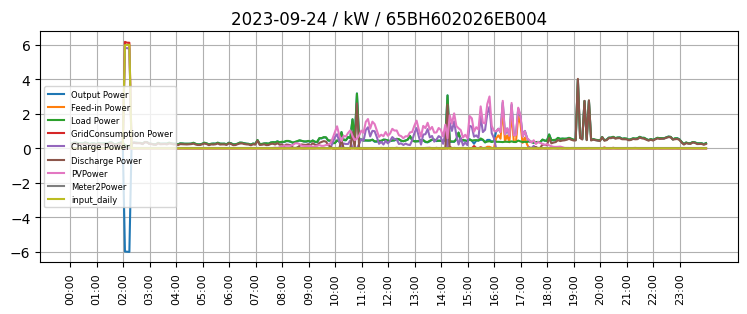

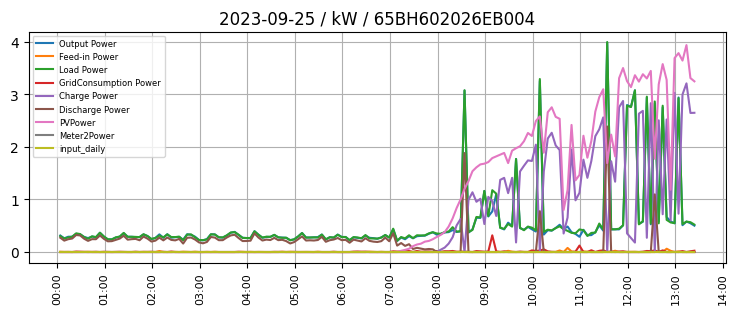

In [29]:
result=f.get_raw('day', d=f.date_list(span='2days', today=1), v=f.power_vars, plot=1)

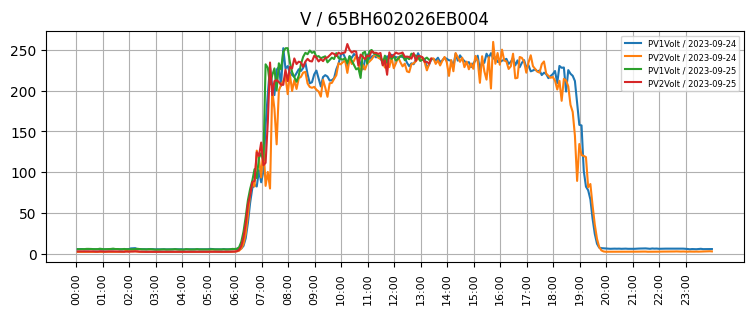

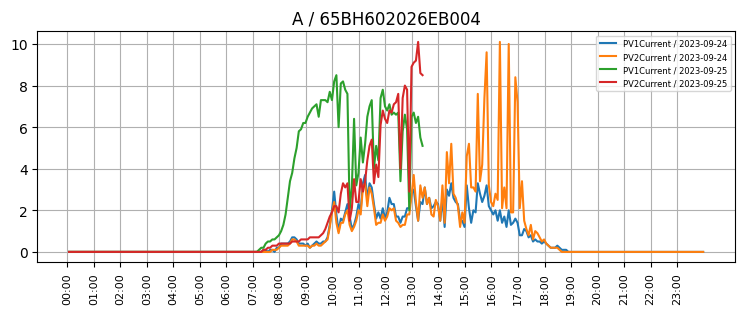

In [30]:
result=f.get_raw('day', d=f.date_list(span='2days', today=1), v=['pv1Volt', 'pv2Volt', 'pv1Current', 'pv2Current'], plot=2)

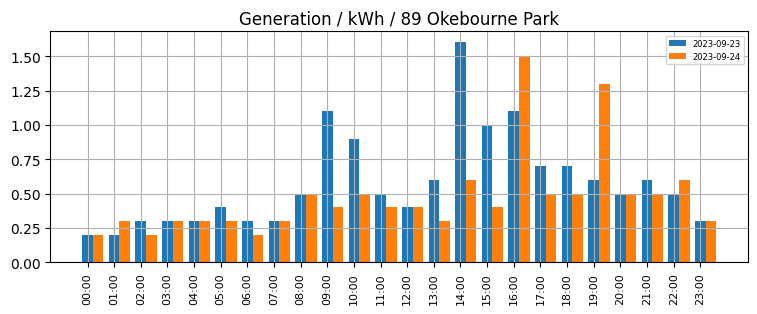

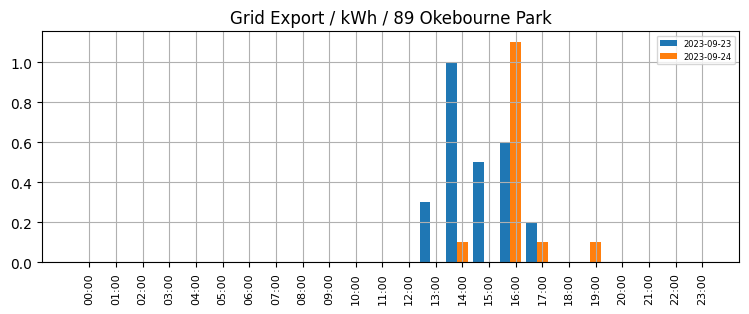

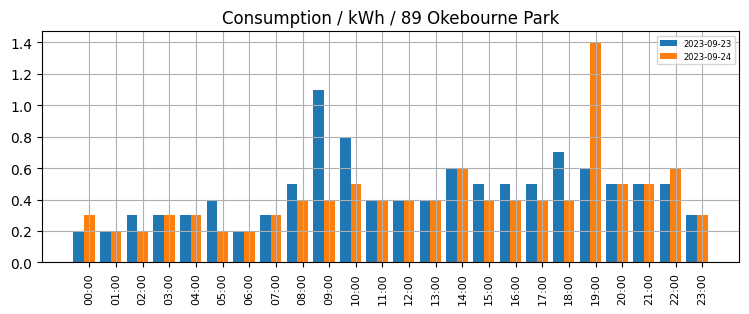

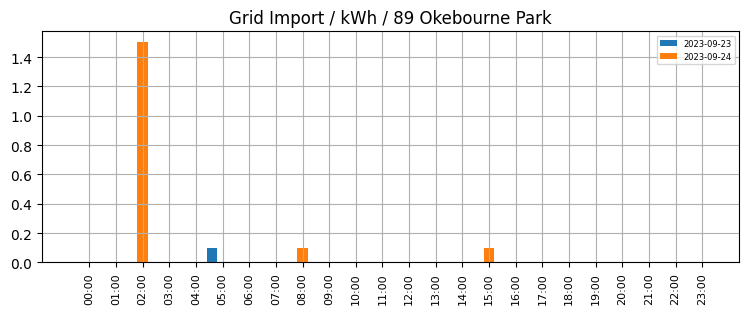

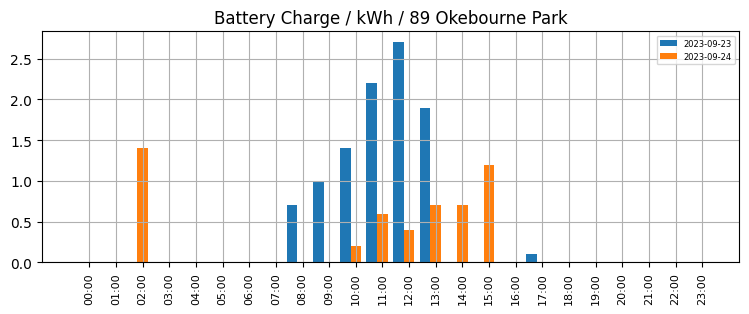

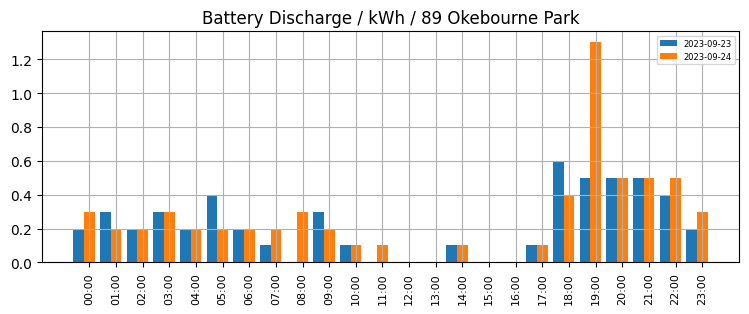

In [31]:
result=f.get_report('day', d=f.date_list(span='2days'), v=f.report_vars, summary=1, plot=1, station=1)

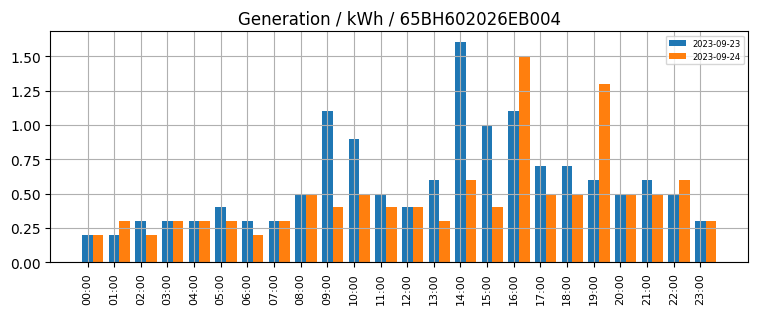

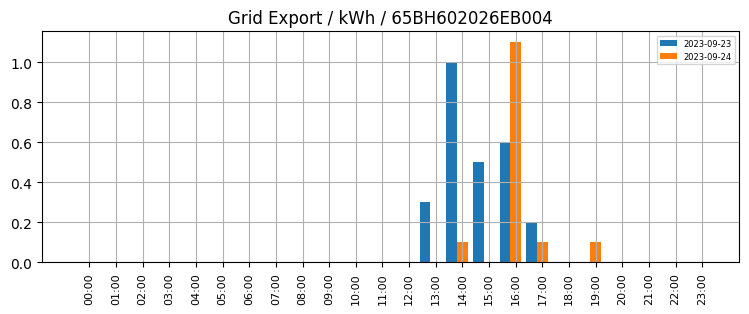

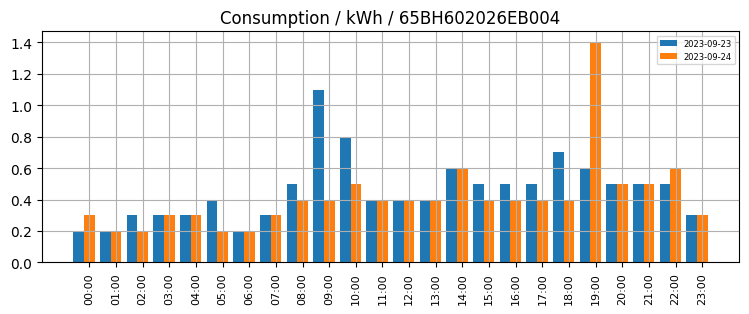

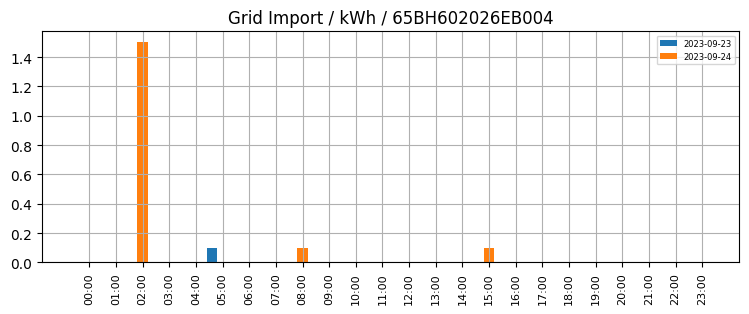

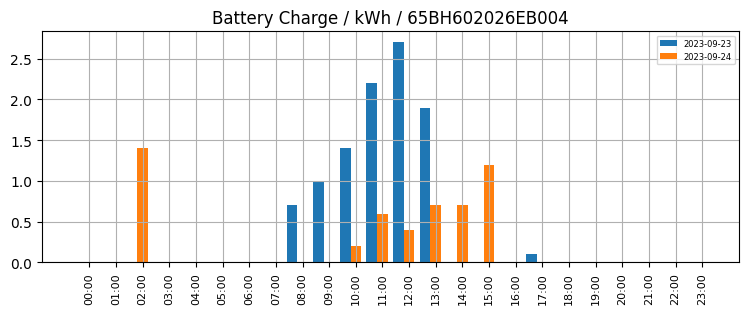

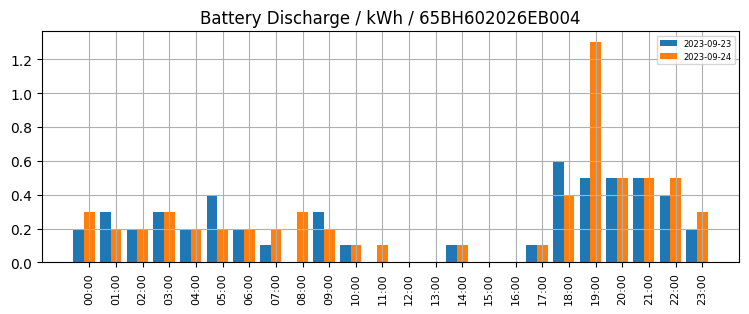

In [32]:
result=f.get_report('day', d=f.date_list(span='2days'), v=f.report_vars, summary=1, plot=1)

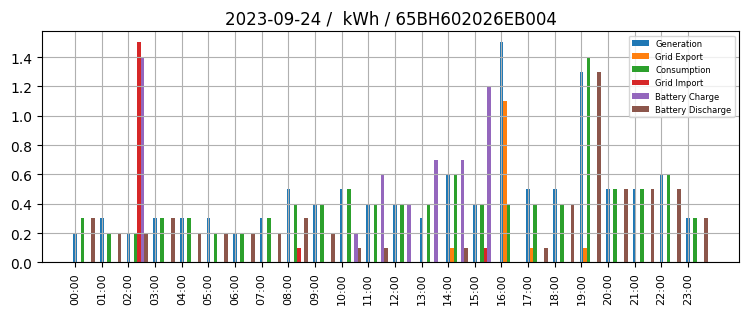

In [33]:
result=f.get_report('day', d=f.date_list(), v=f.report_vars, summary=1, plot=2)

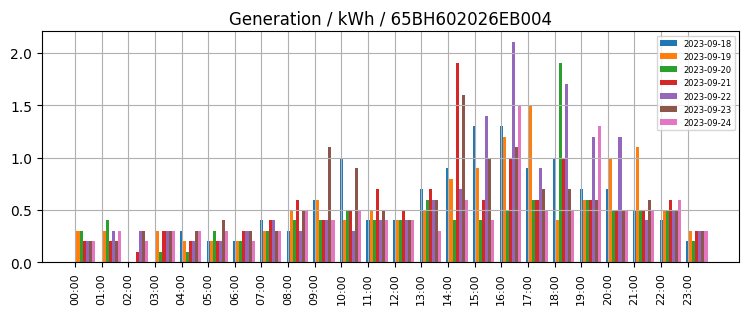

In [34]:
result=f.get_report('day', d=f.date_list(span='week'), v='generation', summary=1, plot=1)

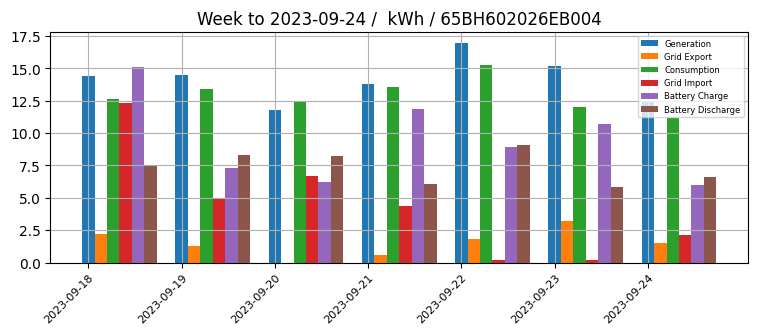

In [35]:
result=f.get_report('week', d=f.date_list(), v=f.report_vars, summary=1, plot=2)

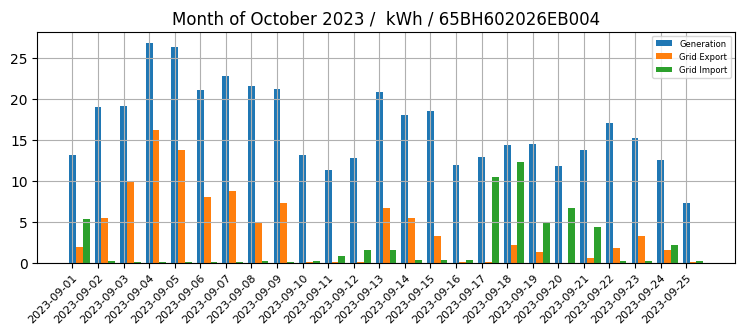

In [36]:
result=f.get_report('month', d=f.date_list(), v=['generation', 'feedin', 'gridConsumption'], summary=1, plot=2)

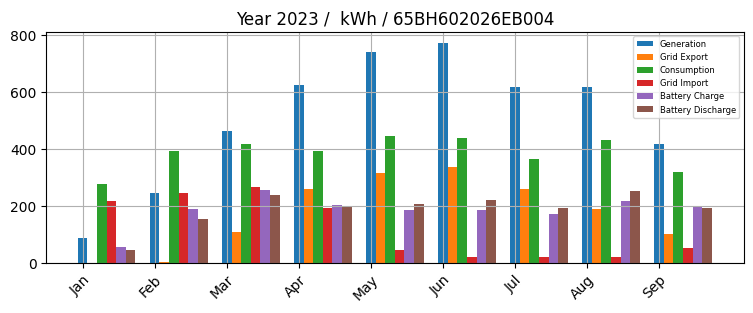

In [37]:
result=f.get_report('year', d=f.date_list(), v=f.report_vars, summary=1, plot=2)

In [38]:
# test conversion of report data to total and 24 hour profile
result = f.report_value_profile(f.get_report('day', f.date_list(span='week',today=1)[-3:], v='loads'))
print(result)

(12.2, [0.296, 0.259, 0.296, 0.333, 0.333, 0.296, 0.222, 0.296, 0.555, 0.778, 0.666, 0.703, 0.778, 0.444, 0.666, 0.5, 0.5, 0.5, 0.611, 1.111, 0.555, 0.555, 0.611, 0.333])


In [39]:
# test fix_value for day report
f.fix_values = 0
result = f.get_report('day', d='2023-09-18', v='loads')
print(result[0]['total'])
f.fix_values = 1
f.get_report('day', d='2023-09-18', v='loads')

201536319.8


[{'variable': 'loads',
  'data': [{'index': 1, 'value': 0.3000000000001819},
   {'index': 2, 'value': 0.29999999999972715},
   {'index': 3, 'value': 0.1000000000003638},
   {'index': 4, 'value': 0.1999999999998181},
   {'index': 5, 'value': 0.40000000000009095},
   {'index': 6, 'value': 0.29999999999972715},
   {'index': 7, 'value': 0.3000000000001819},
   {'index': 8, 'value': 0.40000000000009095},
   {'index': 9, 'value': 0.40000000000009095},
   {'index': 10, 'value': 0.6999999999998181},
   {'index': 11, 'value': 1},
   {'index': 12, 'value': 0.3000000000001819},
   {'index': 13, 'value': 0.40000000000009095},
   {'index': 14, 'value': 0.6999999999998181},
   {'index': 15, 'value': 0.09999999999990905},
   {'index': 16, 'value': 0.3},
   {'index': 17, 'value': 1.2999999821186066},
   {'index': 18, 'value': 0.7000000178813934},
   {'index': 19, 'value': 1},
   {'index': 20, 'value': 0.699999988079071},
   {'index': 21, 'value': 0.699999988079071},
   {'index': 22, 'value': 0.4000000

In [40]:
# test fix_value for month report
f.get_report('month', d='2023-09-18', v='loads')

[{'variable': 'loads',
  'data': [{'index': 1, 'value': 12.099999999999909},
   {'index': 2, 'value': 13.600000000000364},
   {'index': 3, 'value': 9.299999999999727},
   {'index': 4, 'value': 10.5},
   {'index': 5, 'value': 12.599999999999909},
   {'index': 6, 'value': 12.899999999999636},
   {'index': 7, 'value': 14},
   {'index': 8, 'value': 16.799999999999727},
   {'index': 9, 'value': 13.800000000000182},
   {'index': 10, 'value': 13},
   {'index': 11, 'value': 12},
   {'index': 12, 'value': 12.900000000000091},
   {'index': 13, 'value': 14.199999999999818},
   {'index': 14, 'value': 12.700000000000273},
   {'index': 15, 'value': 15.299999999999727},
   {'index': 16, 'value': 12},
   {'index': 17, 'value': 13.900000000000091},
   {'index': 18, 'value': 12.6},
   {'index': 19, 'value': 13.400000005960464},
   {'index': 20, 'value': 12.399999976158142},
   {'index': 21, 'value': 13.600000023841858},
   {'index': 22, 'value': 15.299999982118607},
   {'index': 23, 'value': 12},
   {'i

In [41]:
# test fix_value for year report
f.get_report('year', d='2023-09-18', v='loads')

[{'variable': 'loads',
  'data': [{'index': 1, 'value': 276.3999999999999},
   {'index': 2, 'value': 393.49999999999994},
   {'index': 3, 'value': 418.5},
   {'index': 4, 'value': 391.7999999999997},
   {'index': 5, 'value': 446.10000000000014},
   {'index': 6, 'value': 439.4999999999998},
   {'index': 7, 'value': 364.7000000000007},
   {'index': 8, 'value': 431.2999999999997},
   {'index': 9, 'value': 319.4}],
  'total': 3481.2,
  'name': 'Consumption',
  'type': 'year',
  'sum': 3481.2,
  'average': 386.8,
  'date': '2023-09-18',
  'count': 9,
  'max': 446.1,
  'max_index': 4,
  'min': 276.4,
  'min_index': 0}]

In [42]:
result = f.get_schedule()
print(f"get = {result}")
result = f.set_schedule(enable=1, pollcy=f.pollcy_item)
print(f"set = {result}")
result = f.get_schedule()
print(f"get = {result}")
result = f.set_schedule(enable=0)
print(f"set = {result}")

get = {'data': [{'templateName': '', 'enable': False, 'templateID': ''}], 'enable': False, 'pollcy': [], 'support': True}
set = {'data': [{'templateName': '', 'enable': False, 'templateID': ''}], 'enable': True, 'pollcy': [{'startH': 7, 'startM': 0, 'endH': 12, 'endM': 0, 'workMode': 'SelfUse', 'soc': '15'}], 'support': True}
get = {'data': [{'templateName': '', 'enable': True, 'templateID': ''}], 'enable': True, 'pollcy': [{'endH': 12, 'workMode': 'SelfUse', 'soc': 15, 'startM': 0, 'startH': 7, 'endM': 0}], 'support': True}
set = {'data': [{'templateName': '', 'enable': True, 'templateID': ''}], 'enable': False, 'pollcy': [], 'support': True}


In [43]:
f.british_summer_time()

1

In [44]:
# test british summer time
import datetime
dates = f.date_list(span='year', today=2, s=datetime.datetime.now())
flags = f.british_summer_time(dates)
last = 0
for date, flag in zip(dates, flags):
    if last != flag:
        print(f"{date} = {flag}")
    last = flag

2023-09-25 = 1
2023-10-29 = 0
2024-03-31 = 1
